# Reefetuar as análises com a normalização Standard Scaler

## Definição de pronto

### Dados preparados no ambiente

## Definição de entregue

### Notebook fazendo a avaliação

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.preprocessing as sklpp

pd.set_option("display.precision", 4)

df_wine = pd.read_parquet("../../Data/Processed/wine/df_wine.parquet") 

In [2]:
''' Criando dataframe normalizado'''

''' Referência: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html'''
'''             https://stackoverflow.com/questions/26414913/normalize-columns-of-pandas-data-frame'''
'''             https://towardsdatascience.com/scale-standardize-or-normalize-with-scikit-learn-6ccc7d176a02'''

# Usando StandardScaler para normalizar cada coluna
standard_scaler = sklpp.StandardScaler()

# Retirada da coluna de tipo de vinho
df_wine_normalizado = standard_scaler.fit_transform(df_wine.drop(['type'], axis = 1))
df_wine_normalizado = pd.DataFrame(df_wine_normalizado)

# scikit learn retira as colunas do dataframe modificado. Colocando-as de volta
df_wine_normalizado.columns = df_wine.drop(['type'], axis = 1).columns

# visualização da normalização
df_wine_normalizado.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.1425,2.1888,-2.1928,-0.7448,0.5700,-1.1001,-1.4464,1.0350,1.8131,0.1931,-0.9155,-0.9372
1,0.4510,3.2822,-2.1928,-0.5976,1.1980,-0.3113,-0.8625,0.7015,-0.1151,0.9996,-0.5801,-0.9372
2,0.4510,2.5533,-1.9176,-0.6607,1.0267,-0.8748,-1.0925,0.7682,0.2581,0.7980,-0.5801,-0.9372
3,3.0738,-0.3624,1.6611,-0.7448,0.5414,-0.7621,-0.9863,1.1017,-0.3639,0.3275,-0.5801,0.2080
4,0.1425,2.1888,-2.1928,-0.7448,0.5700,-1.1001,-1.4464,1.0350,1.8131,0.1931,-0.9155,-0.9372


## Refazendo as análises

In [3]:
''' Estatísticas Gerais'''

df_wine_normalizado.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6.4970e+03,6.4970e+03,6.4970e+03,6.4970e+03,6.4970e+03,6.4970e+03,6.4970e+03,6.4970e+03,6.4970e+03,6.4970e+03,6.4970e+03,6.4970e+03
mean,-3.8496e-16,1.0499e-16,2.1873e-17,3.4997e-17,3.4997e-17,-8.7492e-17,-6.9993e-17,-3.5347e-15,2.7297e-15,-5.4245e-16,9.9741e-16,-3.1060e-16
std,1.0001e+00,1.0001e+00,1.0001e+00,1.0001e+00,1.0001e+00,1.0001e+00,1.0001e+00,1.0001e+00,1.0001e+00,1.0001e+00,1.0001e+00,1.0001e+00
min,-2.6346e+00,-1.5773e+00,-2.1928e+00,-1.0180e+00,-1.3426e+00,-1.6636e+00,-1.9418e+00,-2.5302e+00,-3.1006e+00,-2.0919e+00,-2.0894e+00,-3.2277e+00
25%,-6.2893e-01,-6.6616e-01,-4.7233e-01,-7.6580e-01,-5.1480e-01,-7.6207e-01,-6.8553e-01,-7.8595e-01,-6.7486e-01,-6.8059e-01,-8.3162e-01,-9.3723e-01
50%,-1.6609e-01,-3.0169e-01,-5.9414e-02,-5.1356e-01,-2.5788e-01,-8.5943e-02,3.9907e-02,6.4489e-02,-5.2874e-02,-1.4294e-01,-1.6082e-01,2.0800e-01
75%,3.7390e-01,3.6650e-01,4.9115e-01,5.5844e-01,2.5595e-01,5.9019e-01,7.1226e-01,7.6485e-01,6.3131e-01,4.6192e-01,6.7767e-01,2.0800e-01
max,6.6994e+00,7.5344e+00,9.2313e+00,1.2687e+01,1.5842e+01,1.4564e+01,5.7373e+00,1.4769e+01,4.9230e+00,9.8709e+00,3.6962e+00,3.6437e+00


In [4]:
''' Avaliar a faixa dimâmica por variável'''

''' Loop por colunas do df retirando a coluna type que é do tipo string formatando o resultado em 2 casa decimais'''

for (column, _ ) in df_wine_normalizado.items():
    print(f'{column} \t faixa dinâmica: \t {"{:.2f}".format(df_wine_normalizado[column].max() - df_wine_normalizado[column].min())}')

fixed acidity 	 faixa dinâmica: 	 9.33
volatile acidity 	 faixa dinâmica: 	 9.11
citric acid 	 faixa dinâmica: 	 11.42
residual sugar 	 faixa dinâmica: 	 13.70
chlorides 	 faixa dinâmica: 	 17.18
free sulfur dioxide 	 faixa dinâmica: 	 16.23
total sulfur dioxide 	 faixa dinâmica: 	 7.68
density 	 faixa dinâmica: 	 17.30
pH 	 faixa dinâmica: 	 8.02
sulphates 	 faixa dinâmica: 	 11.96
alcohol 	 faixa dinâmica: 	 5.79
quality 	 faixa dinâmica: 	 6.87


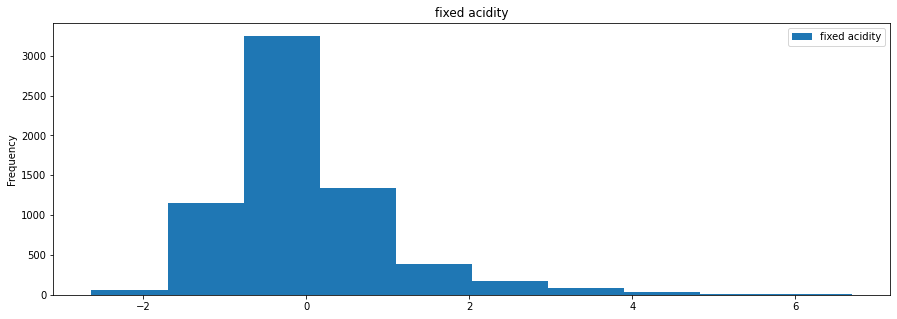

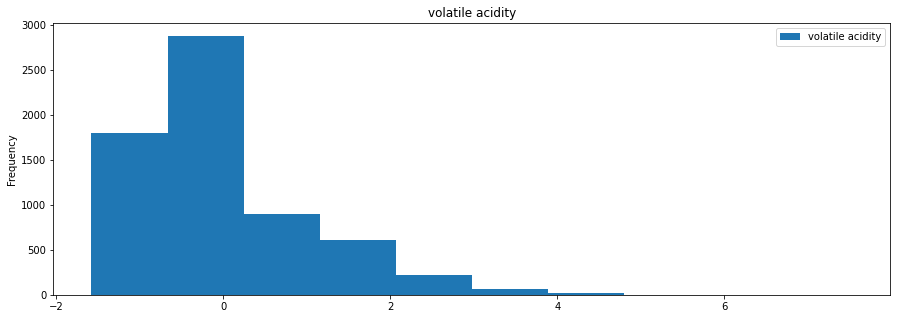

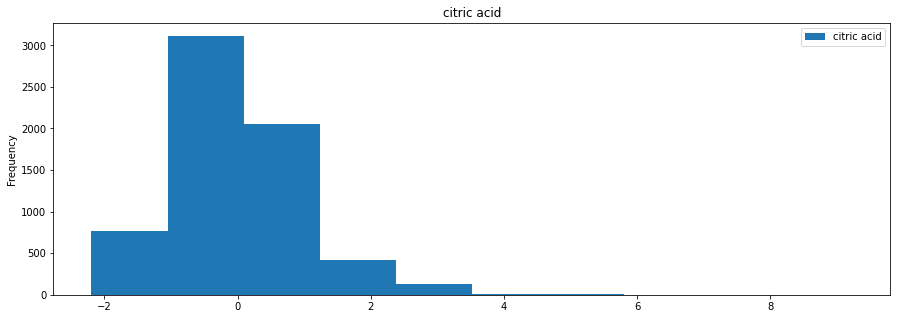

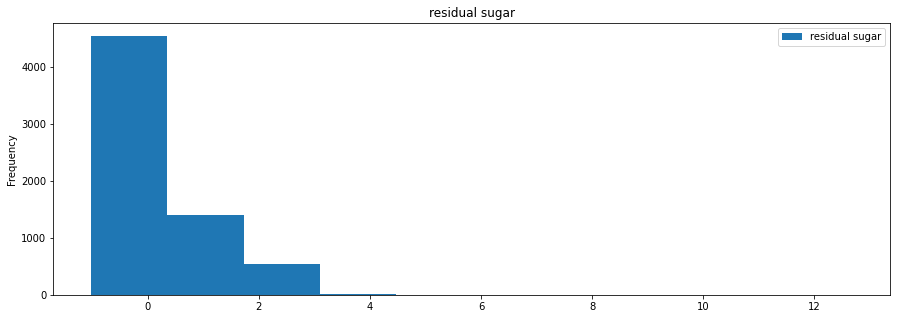

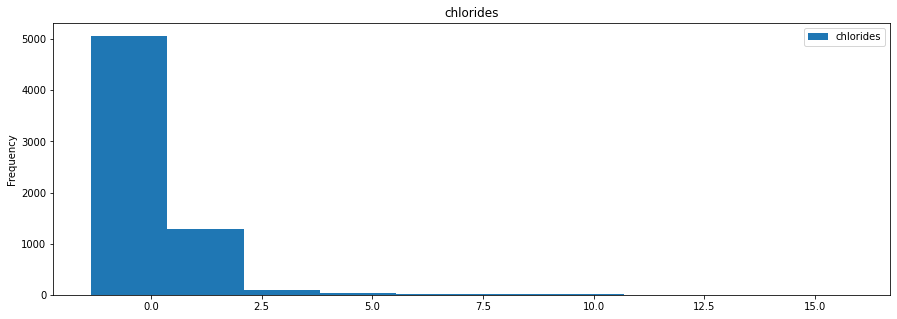

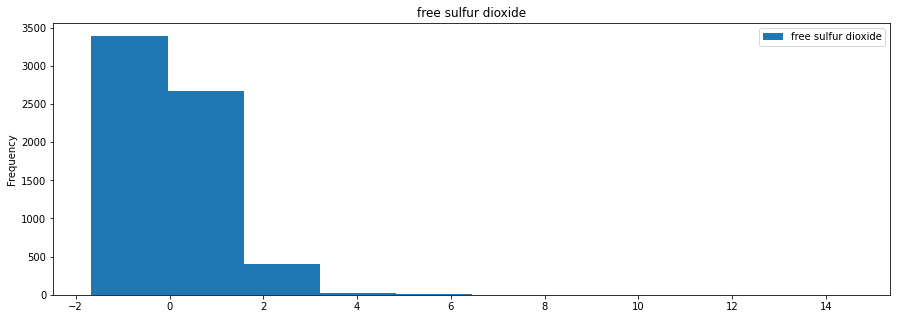

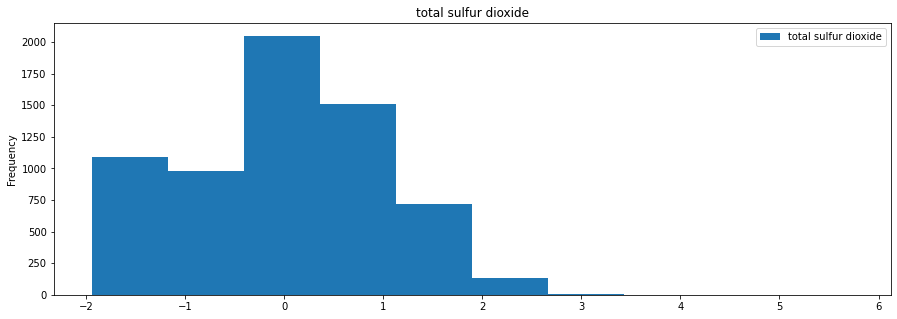

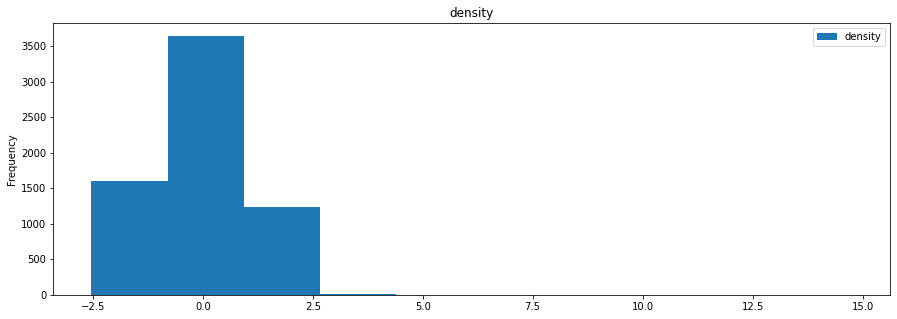

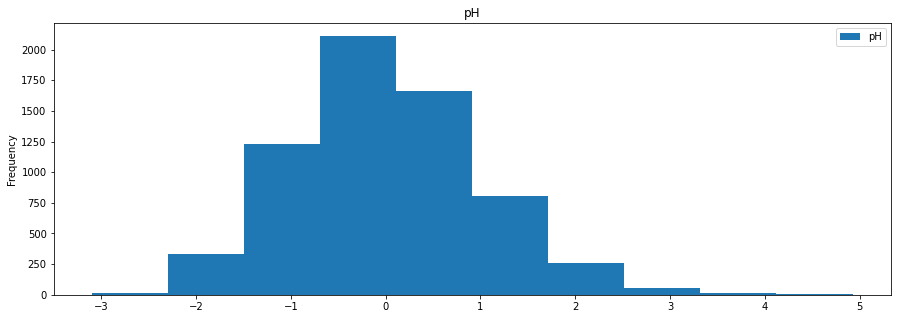

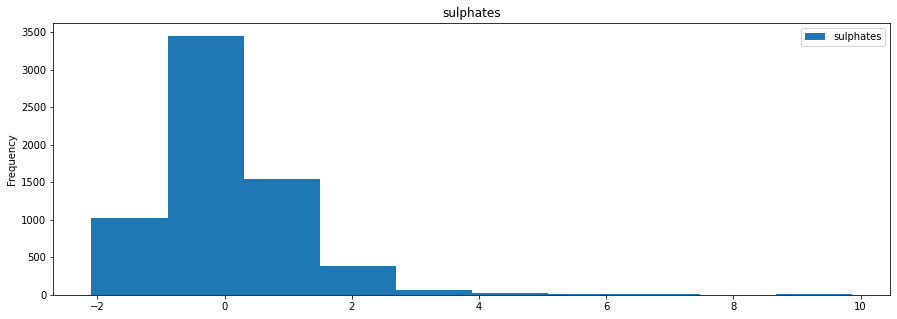

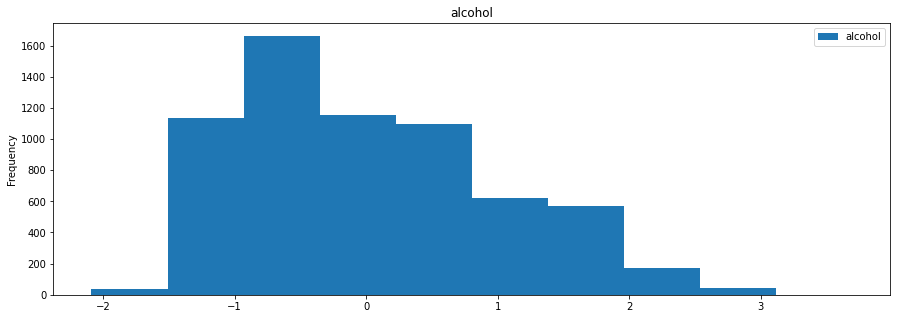

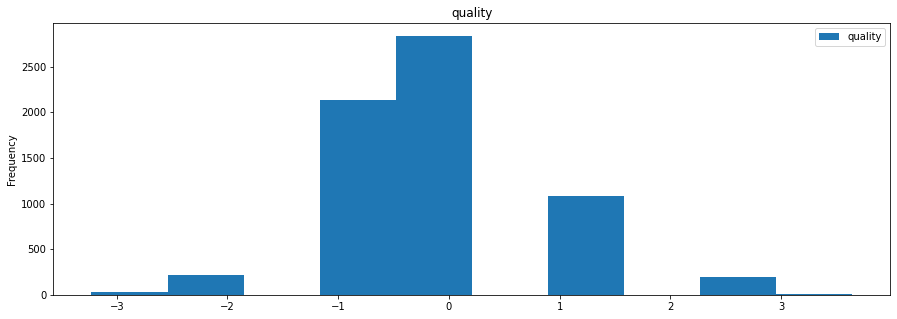

In [5]:
''' Histogramas com as distribuições das variáveis'''

''' Referência: https://matplotlib.org/gallery/index.html'''

for (column, _ ) in df_wine_normalizado.items():
    plt.figure()
    df_wine_normalizado[column].plot.hist(figsize=(15,5), legend=True);
    plt.legend(ncol = 1)
    plt.title(column)

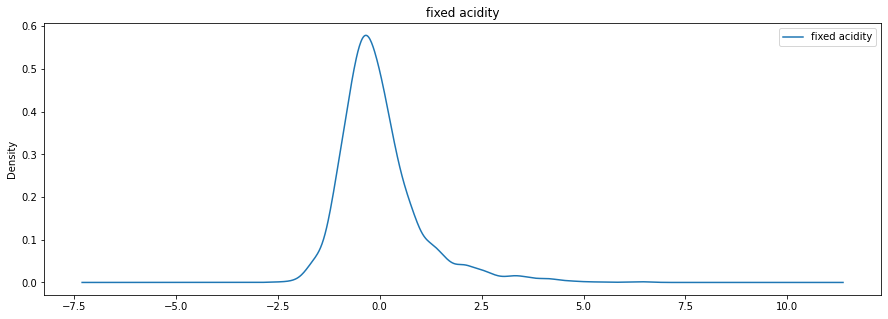

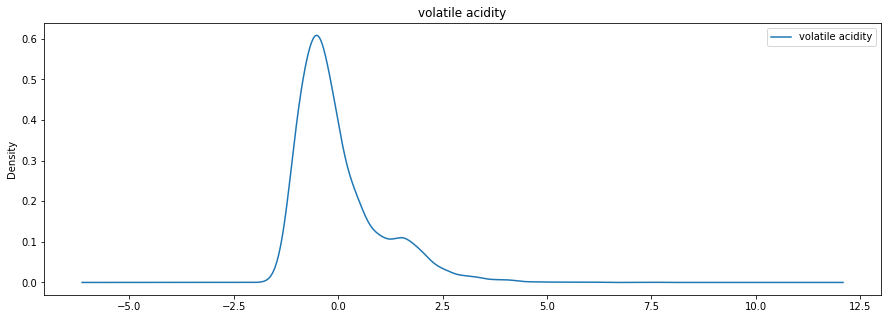

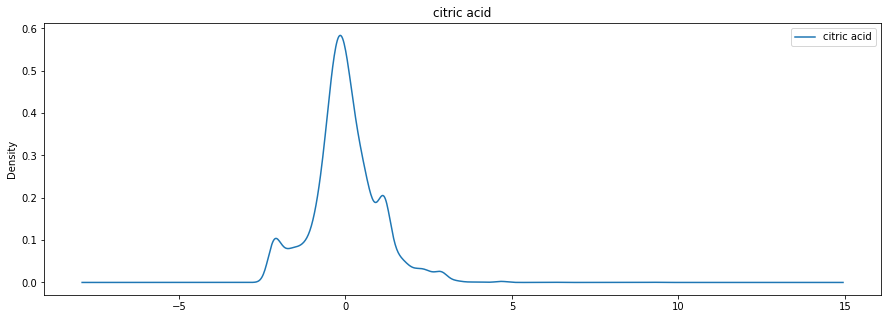

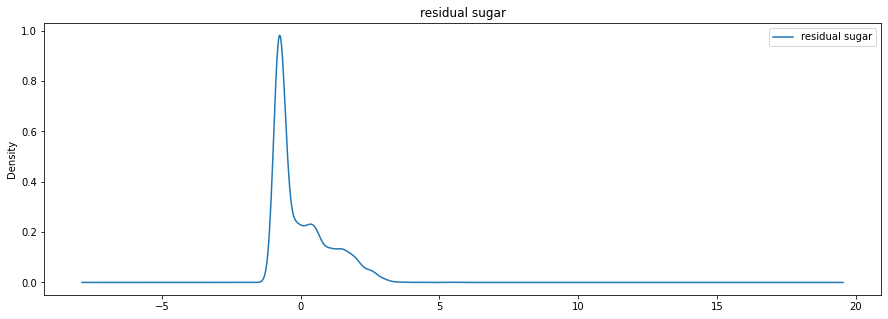

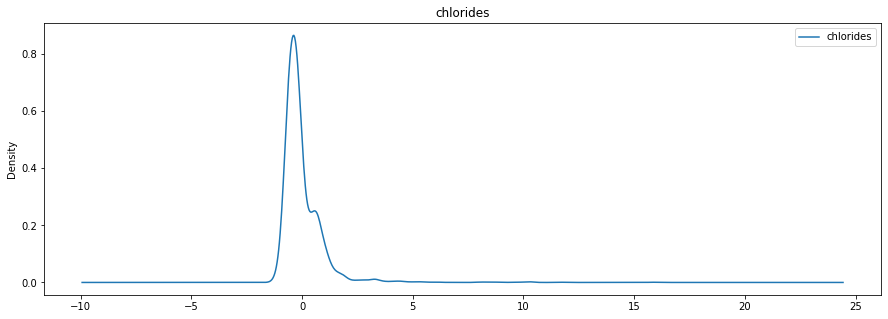

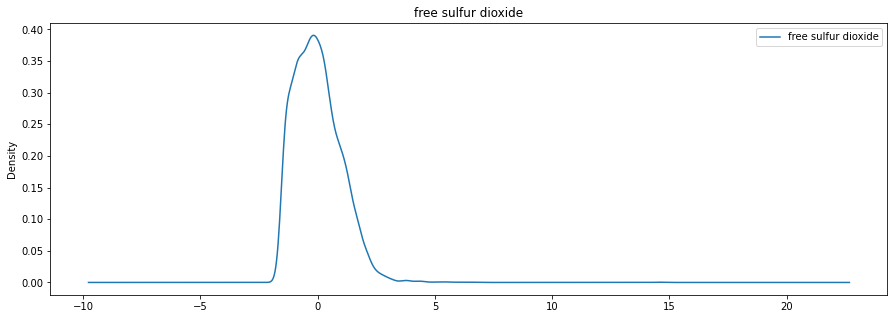

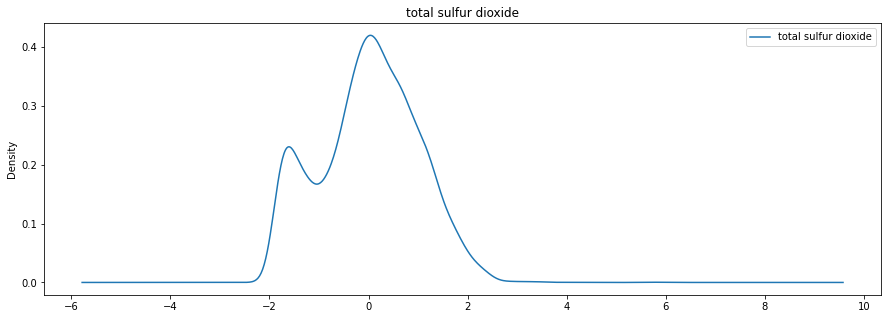

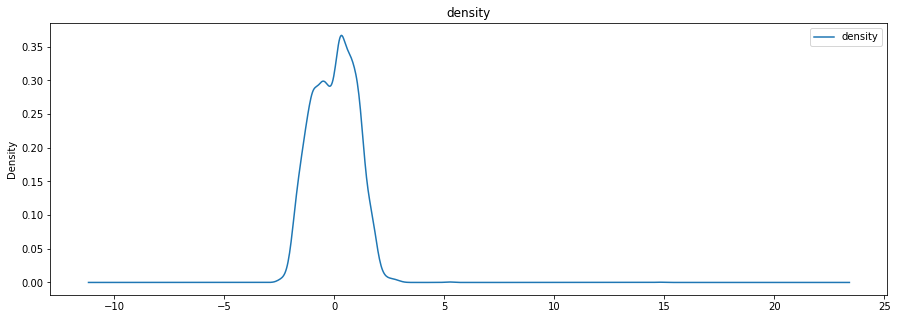

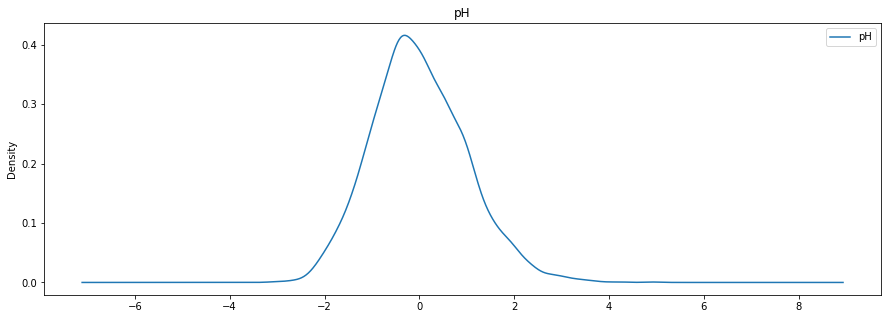

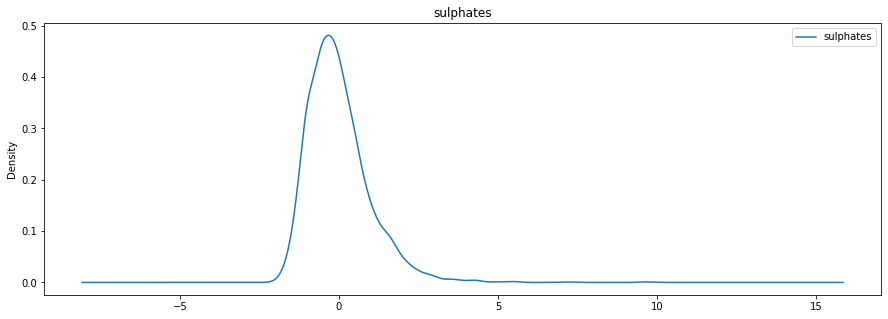

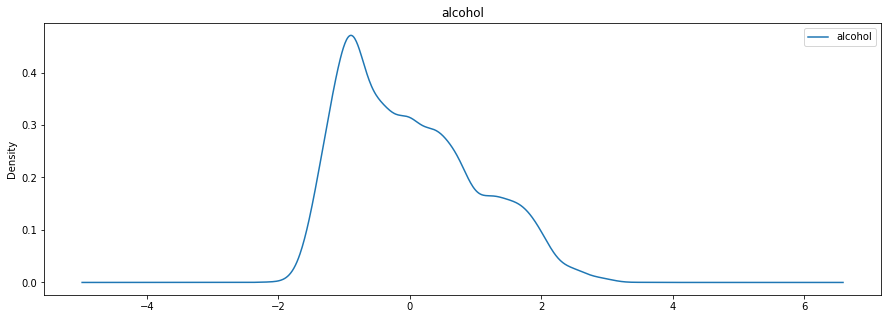

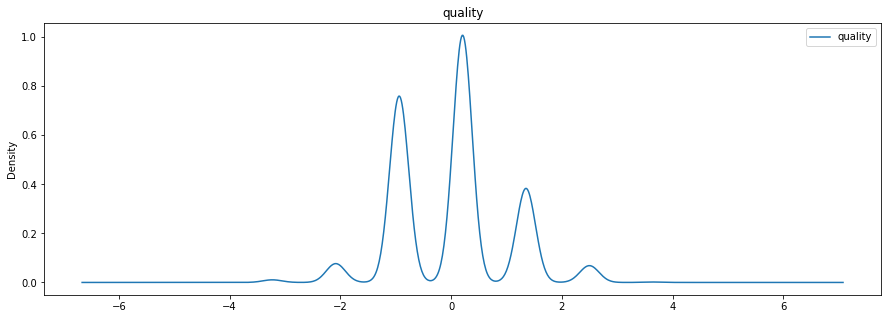

In [6]:
''' Utilizar KDE - Kernel Density Estimate '''

''' Referência: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.kde.html '''

for (column, _ ) in df_wine_normalizado.items():
    plt.figure()
    df_wine_normalizado[column].plot.kde(figsize=(15,5), legend=True);
    plt.legend(ncol = 1)
    plt.title(column)

In [7]:
''' Correlação entre as variáveis'''

df_wine_normalizado.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.0000,0.2190,0.3244,-0.1120,0.2982,-0.2827,-0.3291,0.4589,-0.2527,0.2996,-0.0955,-0.0767
volatile acidity,0.2190,1.0000,-0.3780,-0.1960,0.3771,-0.3526,-0.4145,0.2713,0.2615,0.2260,-0.0376,-0.2657
citric acid,0.3244,-0.3780,1.0000,0.1425,0.0390,0.1331,0.1952,0.0962,-0.3298,0.0562,-0.0105,0.0855
residual sugar,-0.1120,-0.1960,0.1425,1.0000,-0.1289,0.4029,0.4955,0.5525,-0.2673,-0.1859,-0.3594,-0.0370
chlorides,0.2982,0.3771,0.0390,-0.1289,1.0000,-0.1950,-0.2796,0.3626,0.0447,0.3956,-0.2569,-0.2007
free sulfur dioxide,-0.2827,-0.3526,0.1331,0.4029,-0.1950,1.0000,0.7209,0.0257,-0.1459,-0.1885,-0.1798,0.0555
total sulfur dioxide,-0.3291,-0.4145,0.1952,0.4955,-0.2796,0.7209,1.0000,0.0324,-0.2384,-0.2757,-0.2657,-0.0414
density,0.4589,0.2713,0.0962,0.5525,0.3626,0.0257,0.0324,1.0000,0.0117,0.2595,-0.6867,-0.3059
pH,-0.2527,0.2615,-0.3298,-0.2673,0.0447,-0.1459,-0.2384,0.0117,1.0000,0.1921,0.1212,0.0195
sulphates,0.2996,0.2260,0.0562,-0.1859,0.3956,-0.1885,-0.2757,0.2595,0.1921,1.0000,-0.0030,0.0385


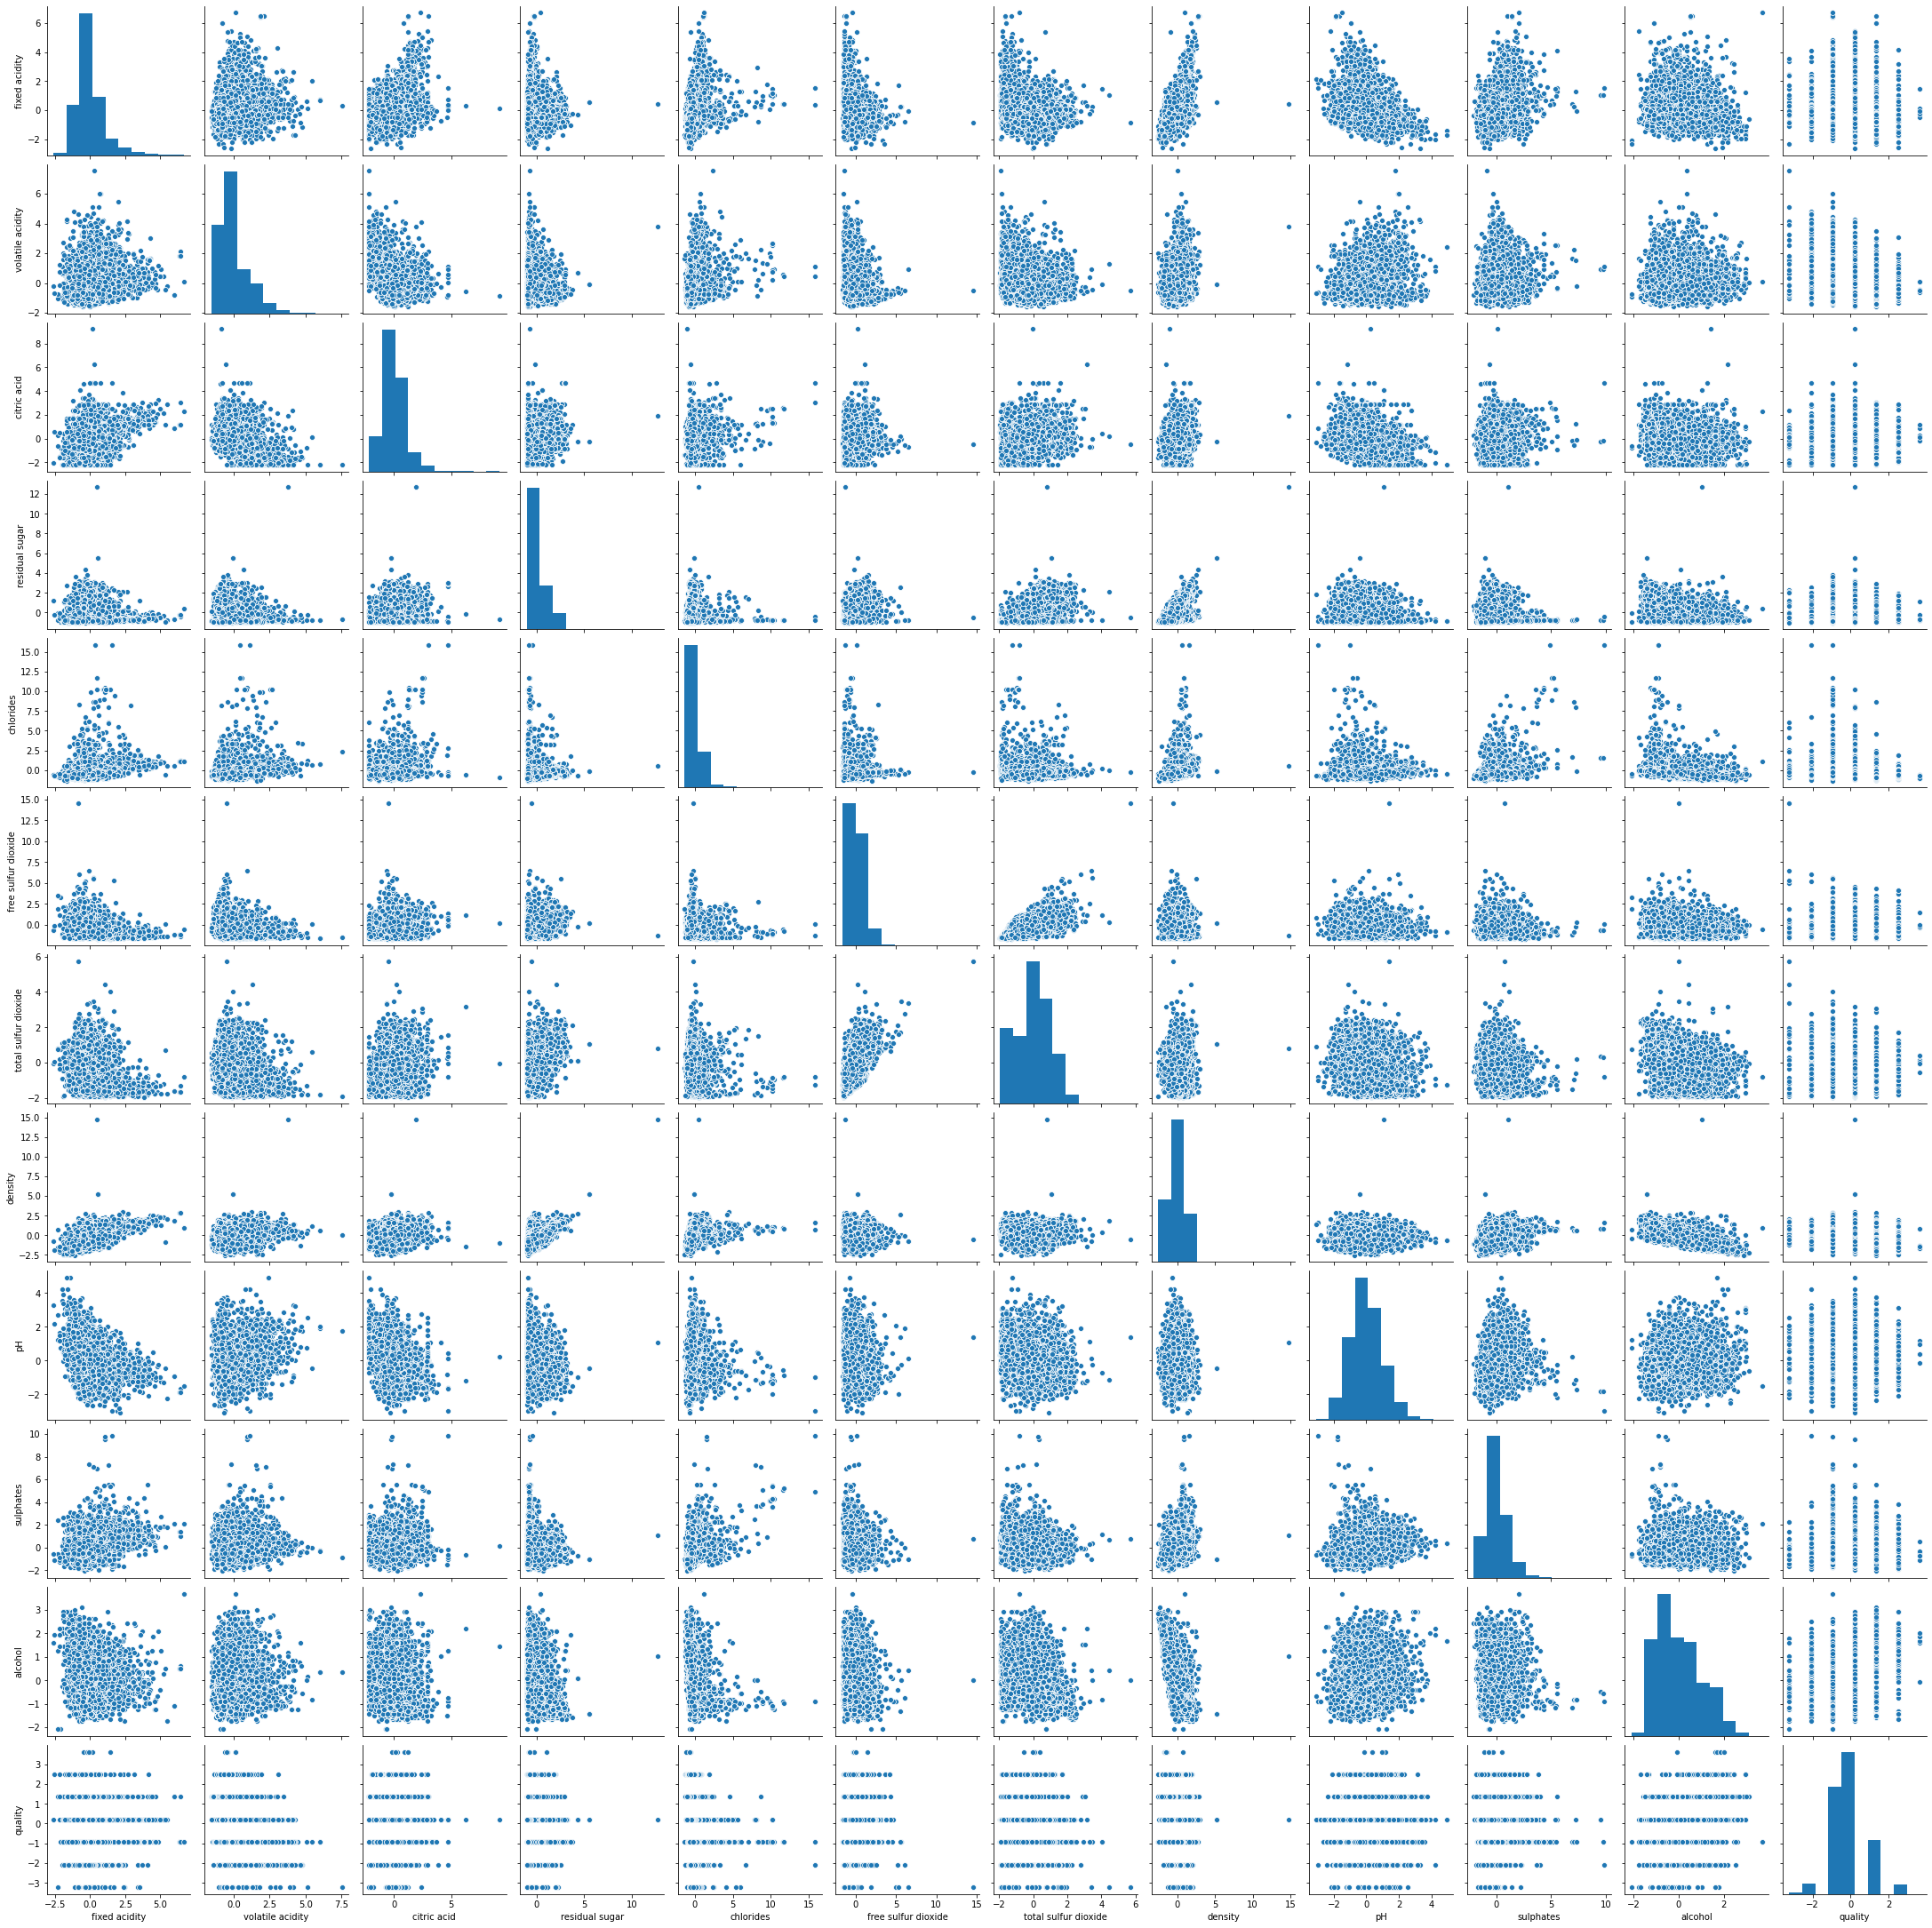

In [8]:
''' Scatter Plot'''

''' Referência: https://seaborn.pydata.org/generated/seaborn.pairplot.html'''

import seaborn as sb
sb.pairplot(df_wine_normalizado)

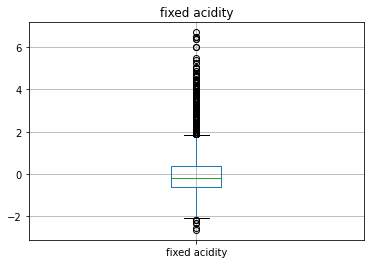

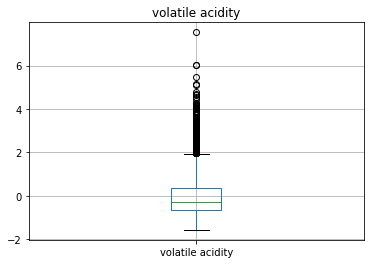

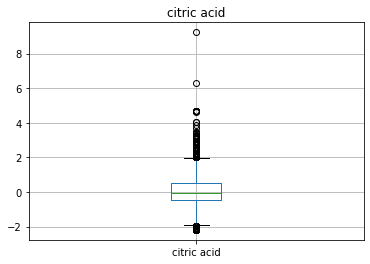

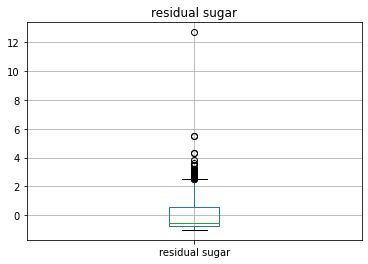

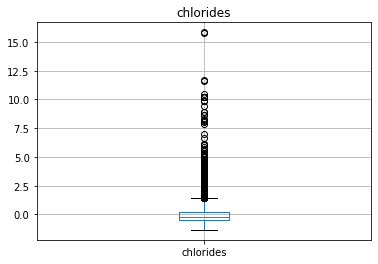

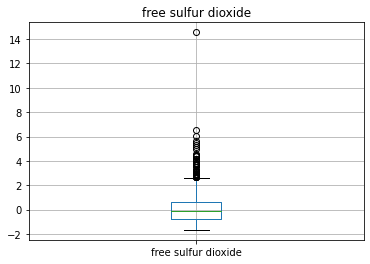

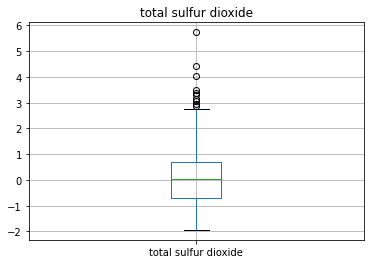

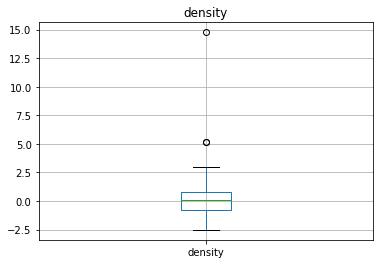

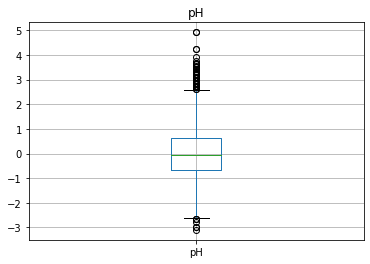

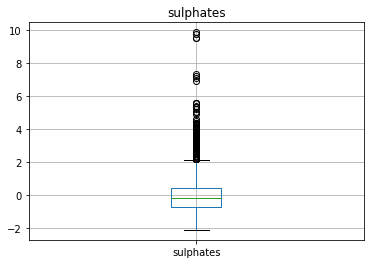

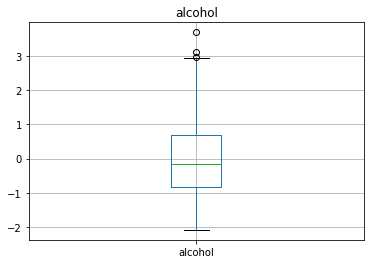

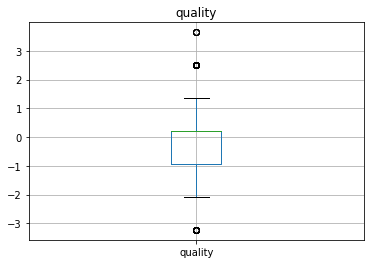

In [9]:
''' Box Plot'''
''' Referência: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.boxplot.html'''

for (column_name, _ ) in df_wine_normalizado.items():
    plt.figure()
    df_wine_normalizado.boxplot(column = column_name)
    plt.title(column_name)